# Implementación Regresión Líneal + Gradient Descent
**Autor: Ronald Borja Román**

In [8]:
# Librerías 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [24]:
class SimpleLinearRegression:
    # Constructor: Inicializar atributos del objeto
    def __init__(self, lr=0.1, m=0, b=0):
        self.lr = lr
        self.m = m
        self.b = b 
        
    # Descenso de gradiente -> Actualizar parametros del modelo
    def gradient_descent(self, x, y): 
        m_gradiente = 0
        b_gradiente = 0
        n = len(x)
        
        for i in range(n): 
            xi = x[i]
            yi = y[i]
            
            m_gradiente += -(2/n)*xi*(yi - (self.m * xi + self.b))
            b_gradiente += -(2/n)*(yi - (self.m * xi + self.b))
            
        self.m = self.m - m_gradiente*self.lr 
        self.b = self.b - b_gradiente*self.lr 
        
    # Entrenar el modelo
    def train(self, x, y, epochs=500, tolerancia = 1e-5): 
        for epoch in range(epochs):
            m_anterior, b_anterior = self.m, self.b
            self.gradient_descent(x, y)
            
            # Criterio de convergencia 
            if abs(m_anterior - self.m) < tolerancia and (b_anterior - self.b) < tolerancia:
                print(f'Se alcanzó la convergencia en la epoca {epoch}')
                break
             
    # Gráficar los resultados
    def plot_results(self, x, y, color): 
        plt.scatter(x, y, color=color)
        plt.plot(x, self.m * x + self.b, color='red')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.title('Resultados Regresión Lineal')
        plt.show()
        
    def score(self, x_test, y_test): 
        assert len(x_test) == len(y_test)
        n = len(x_test)
        preds = self.m * x_test + self.b
        rmse = np.sqrt(np.sum((preds - y_test)**2)/n)
        return rmse

In [25]:
# Prueba: 
np.random.seed(42) 
X = 2 * np.random.rand(100, 1) 
y = 4 + 3 * X + np.random.randn(100, 1)

In [26]:
miModelo = SimpleLinearRegression()
miModelo.train(X, y)

Se alcanzó la convergencia en la epoca 232


In [29]:
miModelo.score(X, y)

0.8981005481643611

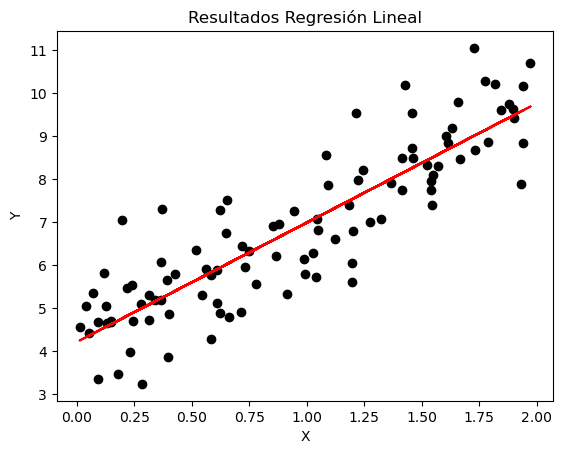

In [34]:
miModelo.plot_results(X, y, color='black')